## Fashion MNIST Classification

### 1. Import Libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers  # type: ignore

### 2. Load Dataset

In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
# Normalize pixel values (0–255 → 0–1)
X_train = x_train / 255.0
X_test = x_test / 255.0

In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", 
               "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### 3. Visualize Data

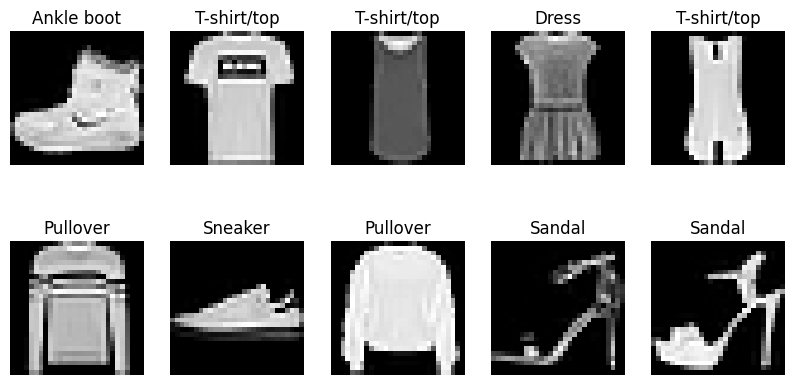

In [11]:
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

### 4. Build a CNN Model

In [13]:
model = keras.Sequential([
    layers.Reshape((28,28,1), input_shape=(28,28)),  # add channel
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")  # 10 classes
])

c:\Users\91918\OneDrive\My New Folder\OneDrive\Desktop\Deep Learning\open_cv\Deep_Learning\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

### 5. Compile Model

In [15]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### 6. Train Model

In [16]:
history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 48s 23ms/step - accuracy: 0.8358 - loss: 0.4529 - val_accuracy: 0.8753 - val_loss: 0.3427
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.8894 - loss: 0.3012 - val_accuracy: 0.8900 - val_loss: 0.3044
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9065 - loss: 0.2544 - val_accuracy: 0.9004 - val_loss: 0.2709
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9172 - loss: 0.2223 - val_accuracy: 0.9072 - val_loss: 0.2630
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9269 - loss: 0.1955 - val_accuracy: 0.9102 - val_loss: 0.2433
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9344 - loss: 0.1733 - val_accuracy: 0.9056 - val_loss: 0.2662
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9422 - loss: 0.1540 - val_accuracy: 0.9162 - val_loss: 0.2485
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.9492 -

### 7. Evaluate Model

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9146 - loss: 0.2782
Test Accuracy: 0.9146000146865845


### 8. Make Predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


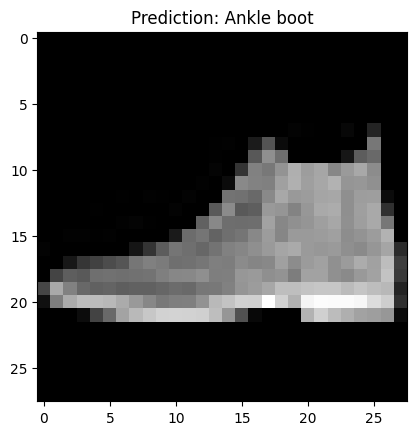

In [20]:
predictions = model.predict(X_test)

plt.imshow(X_test[0], cmap="gray")
plt.title(f"Prediction: {class_names[predictions[0].argmax()]}")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


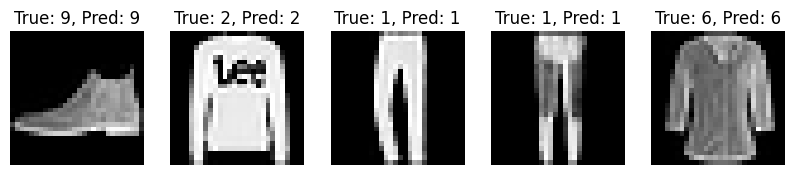

In [22]:
predictions = model.predict(x_test[:5])
plt.figure(figsize=(10, 4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[i], cmap="gray")
    plt.title(f"True: {y_test[i]}, Pred: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()